# DSCI 512 Lecture 1

Outline:

- High level course intro (5 min)
- Code demos (10 min)
- Time complexity (10 min)
- Big O notation (10 min)
- Break (5 min)
- Example Big O analysis (10 min)
- Visualizing time complexities (5 min)
- Space complexity (10 min)
- True/False questions (15 min)


In [1]:
import numpy as np
import pandas as pd

import altair as alt

## High-level course intro (5 min)

Course goals:

- "Classic" undergraduate algorithms and data structures
  - Extremely compressed, a subset of topics
  - No time to go in depth
- What to do if your code is too slow
  - Python-specific

A lot of students struggled with this course in past years:

- Difficulty/pace
- Some topics did not seem relevant to Data Science
- Python coding

Changes for this year:

- Lectures completely re-written to be more applied, show more code and examples.
  - Last year's lecture slides are available in the course repo.
- New high-level course goal about dealing with slow code - so far just a bit of content.
- "From scratch" implementation questions made optional in lab.
- The Python content in DSCI 511 has been beefed up, this will hopefully help.

Note: this lecture is meant to be run in Jupyter - part of the experience is that some cells take longer to run than others. Simply reading the notebook will not make sense.

## Code demos (15 min)

#### Demo 1: searching (list vs. set)

- Common problem: is a certain value present in a collection of items?

In [2]:
n = 10_000_000
x = list(range(n))

In [3]:
-1 in x

False

In [4]:
%timeit (-1 in x)

121 ms ± 10.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [5]:
x = set(range(n))

In [6]:
-1 in x

False

In [7]:
%timeit (-1 in x)

54.3 ns ± 3.02 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


Questions we'll answer in this course:

- How could I have predicted this outcome?
- What if I double the size of $n$: how much slower will the code be in each case? (Quantitative analysis)
- Why did this happen? (not in detail)

Note: we were cheating a little bit, because _creating_ the set takes longer than creating the list. However, as we can see, it's still fast.

#### Demo 2: sorting (insertion vs. quick)

Aside: min vs. argmin

In [8]:
x = [4.2, 98.2, 9.0, 0.1, 30, 2.5, 2.6]

In [9]:
min(x)  # Python min

0.1

In [10]:
np.min(x)  # Numpy min: generally better if working with Numpy arays

0.1

In [11]:
np.argmin(x)

3

In [12]:
x[3]

0.1

Above: `np.argmin` gives us the _index of_ the smallest value.

Now, back to the demo.

In [13]:
n = 20_000
x = list(range(n))

In [14]:
np.random.shuffle(x)

In [15]:
x[:10]

[1651, 9810, 273, 18863, 1081, 14455, 17710, 11418, 16908, 10087]

In [16]:
for i in range(n):
    min_ind = np.argmin(x[i:]) + i
    x[i], x[min_ind] = x[min_ind], x[i]

In [17]:
x[:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [18]:
np.random.shuffle(x)

In [19]:
x[:10]

[17206, 1917, 10960, 18442, 9370, 13829, 6076, 11835, 783, 18349]

In [20]:
x.sort()

In [21]:
x[:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Questions we'll answer in this course:

- How could I have predicted this outcome?
- What if I double the size of $n$ - how much slower will the code be in each case? (Quantitative analysis)
- Why did this happen? (not in detail)

#### Demo 3: batch operations (loop vs. vectorized)

In [22]:
n = 10_000_000
x = np.random.rand(n)
y = np.zeros(n)

In [23]:
x[:10]

array([0.80508117, 0.87735468, 0.88340288, 0.00538785, 0.23316456,
       0.42268779, 0.16282136, 0.98059338, 0.89237438, 0.86073482])

In [24]:
y[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [25]:
for i in range(n):
    y[i] = x[i] * 2

In [26]:
x = np.random.rand(n)
y = np.zeros(n)

In [27]:
y = x * 2

Questions we'll answer in this course:

- How could I have predicted this outcome?
- What if I double the size of $n$: how much slower will the code be in each case? (Quantitative analysis)
- Why did this happen? (not in detail)

## Time complexity (10 min)

- We'll focus on the 2nd question about: how does the runtime change as a function of $n$?
- For now, let's ask ourselves: "if we double $n$, what happens to the number of steps?"

#### Examples from the above demos

For each of the following, what happens to the runtime if we double $n$?

**Operation:** Finding whether a number is in a list.
<br><br><br><br><br><br>
**Answer:** it doubles.
<br>


**Operation:** Finding whether a number is in a set.
<br><br><br><br><br><br>
**Answer:** it stays roughly the same.
<br>

**Operation:** Sorting with my code.
<br><br><br><br><br><br>
**Answer:** it quadruples (4x)
<br><br>

**Operation:** Sorting with `sort`.
<br><br><br><br><br><br>
**Answer:** it slightly more than doubles
<br><br>

**Operation:** Doubling an array with a loop.
<br><br><br><br><br><br>
**Answer:** it doubles
<br><br>  
  

**Operation:** Doubling an array with numpy.
<br><br><br><br><br><br>
**Answer:** it doubles (but is much faster than with a loop!)
<br><br>  

  


These scenarios form part of the roadmap of the course - by the end we'll hopefully have explored most of them.

## Big O notation - intro (10 min)

- We will formalize tiem complexity using _Big O notation_. 
  - In addition to $O$, there is also $o$, $\omega$, $\Omega$, $\theta$, $\Theta$, and more. But Big O is the most common and we'll only discuss Big O.
  - We will not go into the mathematical details but if you're interested, you can read about it online (e.g. the [Wikipedia article](https://en.wikipedia.org/wiki/Big_O_notation)).
- The Big O tells us the **approximate number of steps** an algorithm performs **as a function of the input size** (i.e. $n$ above).


#### Common runtimes

- For example, if doubling $n$ causing the runtime to change 4x, then we say the complexity is $O(n^2)$
  - The function $f(n)=n^2$ has the property that $f(2n)=4f(n)$


| Big O  &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;  &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; |  name  | change in runtime if I double $n$? |
|-------|--------|-------|
| $O(1)$ | constant | same |
| $O(\log n)$ | logarithmic | increased by a constant |
| $O(n)$ | linear | 2x | 
| $O(n \log n)$ | linearithmic | roughly 2x | 
| $O(n^2)$ | quadratic | 4x |
| $O(n^3)$ | cubic | 8x |
| $O(n^k)$ | polynomial | increase by a factor of $2^k$ | 
| $O(2^n)$ | exponential | squared |

- The exponential case is so bad that we just use the same name, "exponential" for a lot of cases, like $O(3^n),O(k^n),O(n!)$, etc
- For $O(2^n)$, increasing $n$ by 1 causes the runtime to double!

#### Back to the examples from earlier 

For each of the following, what is the time complexity in Big O notation?

- Finding whether a number is in a list.
  - Answer: $O(n)$
- Finding whether a number is in a set.
  - Answer: $O(1)$ (more on this next week)
- Sorting with my code.
  - Answer: $O(n^2)$
- Sorting with `sort`.
  - Answer: $O(n \log n)$ (more on this next week)
- Doubling with a loop.
  - Answer: $O(n)$
- Doubling with numpy.
  - Answer: $O(n)$

#### Constant factors are not important

- In Big O notation, we ignore constants.
  - If an algorithm takes $2n$ steps, we write $O(n)$, not $O(2n$).
  - We're interested in the big picture, not the details.
- In Big O notation, we ignore "lower order" terms.
  - If the number of steps is $n+\log n$, we write $O(n)$ not $O(n+\log n)$
  - We're interested in the growth when $n$ is large.
  - The lower order terms stop being important when $n$ is large. 
  - But they might be important when $n$ is small!
- As such, Big O complexities can be misleading at times.
  - Is code that runs in $O(\log n)$ time faster than code that runs in $O(n)$ time?
  - Not always! It depends on the details.
  - $10000\log n$ is more than $0.001n$ for small values of $n$.
  - You will see an example of this phenomenon in lab 2.

## Break (5 min)

## Example Big O analysis (10 min)

Create an array `x` of length `n`:

In [ ]:
n = 20_000
x = list(range(n))
np.random.shuffle(x)

Sort `x` inplace:

In [ ]:
for i in range(n):
    min_ind = np.argmin(x[i:]) + i
    x[i], x[min_ind] = x[min_ind], x[i]

- How does the above code work?
  - For the remaining part of the array `x[i:]`, find the smallest element.
  - Swap this with the current element.
  - Repeat until reaching the end of the array.
- We will revisit this code next class

How long does the code take?

- The swapping takes constant time.
- The call to `np.argmin` needs to look through the array.
  - This takes time proportional to the length of the array.
  - The first time, the length is $n$. Then $n-1$, then $n-2$, etc.
- The number of steps in the above code is

$n+(n-1)+(n-2)+\ldots+3+2+1$

This is an arithmetic series; the sum is $\frac{n(n+1)}{2}=\frac12 n^2 + \frac{n}{2}$

- We ignore the $\frac{n}{2}$ because it is very small compared to $\frac12 n^2$ when $n$ is large.
- E.g. for $n=1000$ we have $\frac{1}{2}n^2= 500000$ vs. $\frac{n}{2}=500$.
- We ignore the $\frac12$ because we're only interested in the growth, not the scaling factor.
- Result: we say the above code is $O(n^2)$.

Put another way, for our purposes this is the same as code that performs $n$ steps inside the loop. The fact that it actually decreases each time is not important enough to show up in the Big O.

#### How to determine the complexity?

- With raw Python/numpy code, we can often "count the number of loops"
  - A loop $n$ times gives $O(n)$
  - A nested loop gives $O(n^2$)
  - etc
- However, we have to think about the functions we're using. 

#### What factors affect the runtime?

- What affects the Big O?
  - Typically, just the algorithm.
- What affects the constant?
  - The algorithm.
    - Does it take $n$ steps or $2n$ steps or $100000n$ steps?
    - How complicated is each step?
  - The _implementation_.
    - How fast is your programming language?
    - How fast are your libraries (e.g. Numpy)?
    - How fast is your laptop?
    - Is there an opportunity for parallel computation?
- The implementation issues are quite complicated. 
  - This relates to the new course-level goal.
  - Well cover this in lecture 8.

## Visualizing time complexities (5 min)

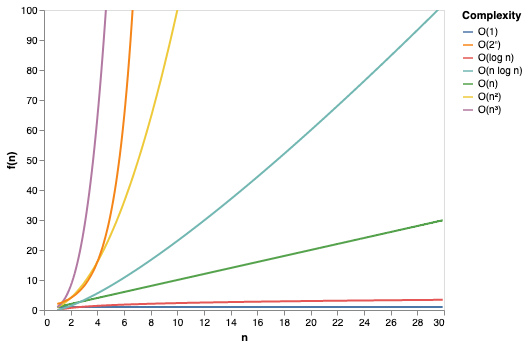

In [28]:
# Disregard code - for plotting purposes only

def build_data(n):
    source = pd.DataFrame({
        'n': n,
        'O(1)': 0*n+1,
        'O(log n)': np.log(n),
        'O(n)': n,
        'O(n log n)': n*np.log(n),
        'O(n\u00B2)': n**2.,
        'O(n\u00B3)': n**3.,
        'O(2\u207f)':  2.**n})

    # Melting the complexities and renaming the axis
    data = source.melt('n')
    data = data.rename(columns={"value": "f(n)", "variable": "Complexity"})
    return data

n = np.arange(1, 30, 0.1)
data = build_data(n)
    
# Plotting the graph
alt.Chart(data).mark_line(clip=True).encode(
    x=alt.X('n'),
    y=alt.Y('f(n)',
            scale=alt.Scale(domain=[0, 100])),
    color='Complexity').configure_axis(grid=False)

It is also common to look at log-log plots:

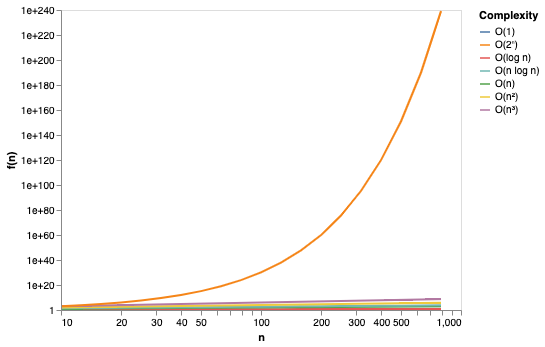

In [29]:
# Disregard code - for plotting purposes only

# Creating the Dataset
n = 10.0**np.arange(1, 3, 0.1)
data = build_data(n)

# Plotting the graph
alt.Chart(data).mark_line(clip=True).encode(
    x=alt.X('n',
            scale=alt.Scale(type='log')),
    y=alt.Y('f(n)',
            scale=alt.Scale(type='log')),
    color='Complexity').configure_axis(grid=False)

- Above: we see that $2^n$ (exponential) is by far the biggest! 
- In the original plot $n^3$ looked bigger because $2^n$ "hadn't caught up yet" in the range of the plot.
- Let's remove $2^n$ so we can see the rest of the log-log plot more clearly:

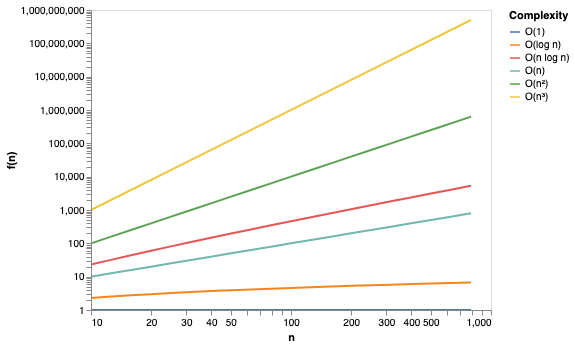

In [30]:
# Disregard code - for plotting purposes only

data2 = data[data['Complexity'] != 'O(2\u207f)'] # Remove 2^n

# Plotting the graph
alt.Chart(data2).mark_line(clip=True).encode(
    x=alt.X('n',
            scale=alt.Scale(type='log')),
    y=alt.Y('f(n)',
            scale=alt.Scale(type='log')),
    color='Complexity').configure_axis(grid=False)

In log-log plots, polynomials turn into straight lines, with slope equal to the exponent.

## Space complexity (10 min)

- If code takes too long to run, that might be a problem.
- Another possible problem is running out of memory.
  - Note: this is NOT the same as "disk space".

In [31]:
import psutil
psutil.virtual_memory()

svmem(total=8589934592, available=2488496128, percent=71.0, used=4186865664, free=177156096, active=2322931712, inactive=2224455680, wired=1863933952)

- Apparently I have about 8 GB of RAM.
- A number typically takes up 8 bytes, so I can store around a billion numbers.
  - Actually less, because I have other stuff going on, not just Python.
  - Plus, there's overhead from within Python.
- If my code needs to store a billion numbers _at the same time_, I can't run it on my laptop. 
- We also analyze space complexity using Big O notation.


- With _time complexity_, we tend to think more about the _algorithms_.
- With _space complexity_, we tend to think more about the _data structures_.



Example 1:

```python
x = np.zeros(n)
```

<br><br><br>
<br><br><br>
Space complexity: $O(n)$



Example 2:

```python
x = np.zeros((n,n))
```

<br><br><br>
<br><br><br>
Space complexity: $O(n^2)$



Example 3:

```python
x = zeros((n,n,5))
```

<br><br><br>
<br><br><br>
Space complexity: $O(n^2)$



Example 4:

```python
x = zeros((n,n,n))
```

<br><br><br>
<br><br><br>
Space complexity: $O(n^3)$

In [33]:
x = np.random.rand(5,5,5)

In [34]:
x[1,2,3]

0.7348899449522436

Example 5:

```python
x = np.zeros(5)
```

<br><br><br>
<br><br><br>
Space complexity: $O(1)$



Example 6 (time permitting): 

You have $n$ users on your social network site, and you want to store a "level of friendship" between every pair of users.

<br><br><br>
<br><br><br>
Space complexity: $O(n^2)$



Example 7 (time permitting):

You have $n$ users on your social network site, and you want to store who is friends who who.

<br><br><br>
<br><br><br>
Space complexity: it depends! If each user only has a constant (independent of $n$) number of friends, then $O(n)$. But in the worst case it could be $O(n^2)$. 

More on this in week 3!



## True/False questions (15 min)

Assume Algorithm A runs in $O(n)$ time and Algorithm B runs in $O\left(\sqrt{n}\right)$ time.

1. Running Algorithm A will take longer than running Algorithm B.
2. Running Algorithm A with $n=20000$ will probably take 2x as long as running it with $n=10000$.
3. Running Algorithm A with $n=2$ will probably take 2x as long as running it with $n=1$.
4. Running Algorithm B with $n=20000$ will probably take 4x as long as running it with $n=10000$.
5. If Algorithm B is the best algorithm for a given task, then there is no way to further speed up one's code.